# **Customer Personality Analysis (EDA & ML)**

### Overview
* Preparing for analysis
* Data Cleaning & Processing
* Exploratory Data Analysis
* Clustering

## Preparing for analysis

#### Importing required libraries

In [214]:
# Standard
import sys
import math

# Processing & Cleaning
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
#import rpy2.robjects.lib.ggplot2 as gp

# Machine Learning
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Elbow method
from scipy.spatial.distance import cdist

#### Loading the data

In [215]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [216]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Data Cleaning & Processing

### Identifying null values

In [218]:
df.isna().sum().sort_values(ascending=False)

Income                 24
ID                      0
NumDealsPurchases       0
Z_Revenue               0
Z_CostContact           0
Complain                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Response                0
dtype: int64

### Mean Imputation for null values

In [219]:
mean_income = round(df['Income'].mean(),2)

df['Income'] = df['Income'].fillna(mean_income)

### Formatting data types

In [220]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

### Dropping ambiguous columns

In [221]:
df.nunique().sort_values(ascending=True)

Z_Revenue                 1
Z_CostContact             1
Response                  2
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp2              2
Complain                  2
AcceptedCmp1              2
AcceptedCmp5              2
Kidhome                   3
Teenhome                  3
Education                 5
Marital_Status            8
NumCatalogPurchases      14
NumStorePurchases        14
NumDealsPurchases        15
NumWebPurchases          15
NumWebVisitsMonth        16
Year_Birth               59
Recency                 100
MntFruits               158
MntSweetProducts        177
MntFishProducts         182
MntGoldProds            213
MntMeatProducts         558
Dt_Customer             663
MntWines                776
Income                 1975
ID                     2240
dtype: int64

In [222]:
df.drop(['Z_Revenue','Z_CostContact'], axis=1, inplace=True)

In [223]:
df['Age'] = (2022 - df['Year_Birth'])
df.drop('Year_Birth', axis=1, inplace=True)

### Removing outliers

In [224]:
df['Age'].sort_values(ascending=False)

239     129
339     123
192     122
1950     82
424      81
       ... 
696      27
747      27
995      27
1170     26
46       26
Name: Age, Length: 2240, dtype: int64

In [225]:
df['Income'].sort_values(ascending=False)

2233    666666.0
617     162397.0
687     160803.0
1300    157733.0
164     157243.0
          ...   
1975      4428.0
1846      4023.0
1524      3502.0
21        2447.0
1245      1730.0
Name: Income, Length: 2240, dtype: float64

In [226]:
df.drop(df[df.Age > 100].index, inplace=True)
df.drop(df[df.Income > 500_000].index, inplace=True)

### Cleaning columns

In [227]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [228]:
df['Education'] = df['Education'].replace('Basic', 'Undergraduate')
df['Education'] = df['Education'].replace(['Graduation','PhD','Master','2n Cycle'], 'Postgraduate')

In [229]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [230]:
df['Marital_Status'] = df['Marital_Status'].replace(['Together','Married'],'Relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Single','Divorced','Widow','Alone','Absurd','YOLO'], 'Single')

In [231]:
df['Children'] = df['Kidhome'] + df['Teenhome']
df.drop(['Kidhome','Teenhome'], axis=1, inplace=True)

In [232]:
df['MntTotal'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [233]:
df['PurchasesTotal'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

In [234]:
df['Accepted_Any_Cmp'] = (df['AcceptedCmp1'] == 1) | (df['AcceptedCmp2'] == 1) | (df['AcceptedCmp3'] == 1) | (df['AcceptedCmp4'] == 1) | (df['AcceptedCmp5'] == 1)

df['Accepted_Any_Cmp'] = df['Accepted_Any_Cmp'].replace([True, False],[1,0])

In [235]:
df.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Dt_Customer', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Age',
       'Children', 'MntTotal', 'PurchasesTotal', 'Accepted_Any_Cmp'],
      dtype='object')

In [236]:
df.columns = ['ID','Education','Marital_Status','Income','Enrollment_Date','Last_Purchase_Ago',
'Wine_Spent','Fruits_Spent','Meat_Spent','Fish_Spent','Sweets_Spent','Gold_Spent',
'Deals_Purchases','Web_Purchases','Catalog_Purchases','Store_Purchases','Web_Visits_Month',
'Accepted_Cmp_3','Accepted_Cmp_4','Accepted_Cmp_5','Accepted_Cmp_1','Accepted_Cmp_2',
'Did_Complain','Accepted_Last_Cmp','Age','Children','Total_Spent','Total_Purchases','Accepted_Any_Cmp']

## Exploratory Data Analysis

### Overview

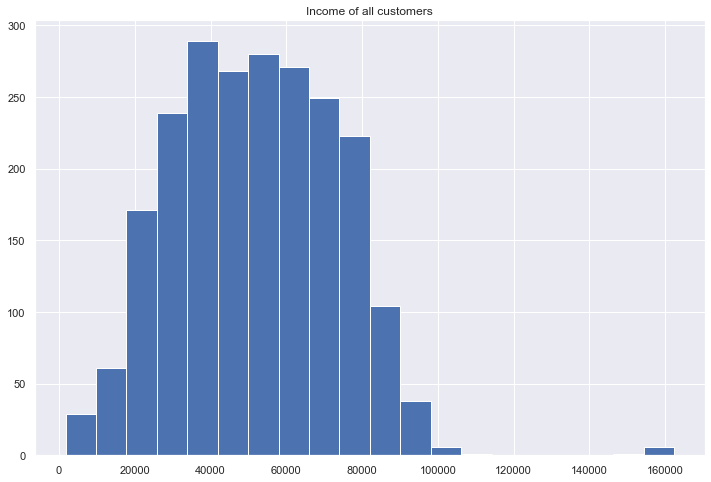

In [237]:
plt.hist(df['Income'], 20)
plt.title('Income of all customers')
plt.show()

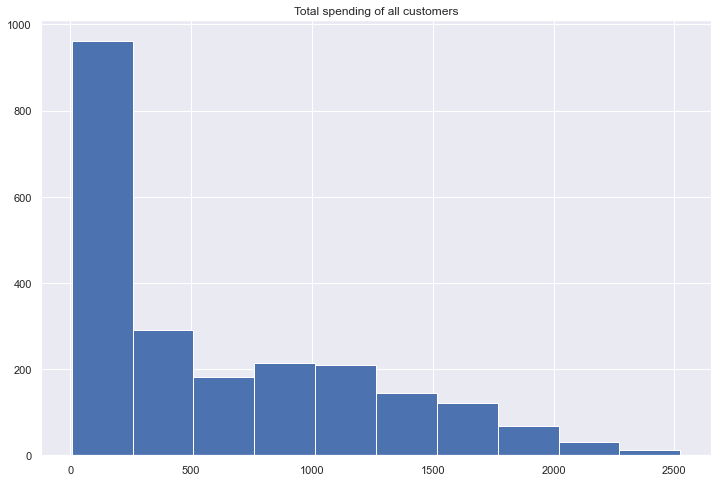

In [238]:
plt.hist(df['Total_Spent'])
plt.title('Total spending of all customers')
plt.show()

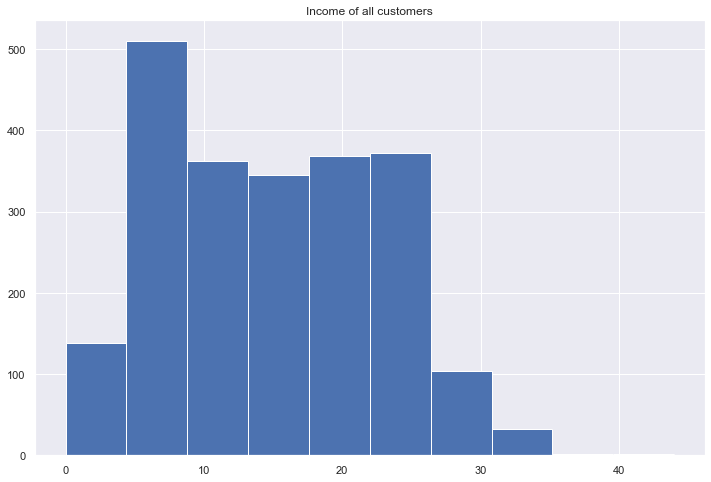

In [239]:
plt.hist(df['Total_Purchases'])
plt.title('Income of all customers')
plt.show()

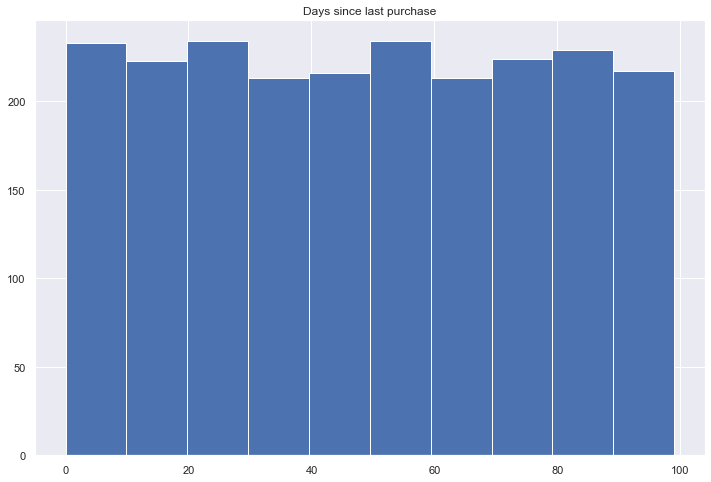

In [240]:
plt.hist(df['Last_Purchase_Ago'])
plt.title('Days since last purchase')
plt.show()

In [241]:
df['Children'].unique()

array([0, 2, 1, 3], dtype=int64)

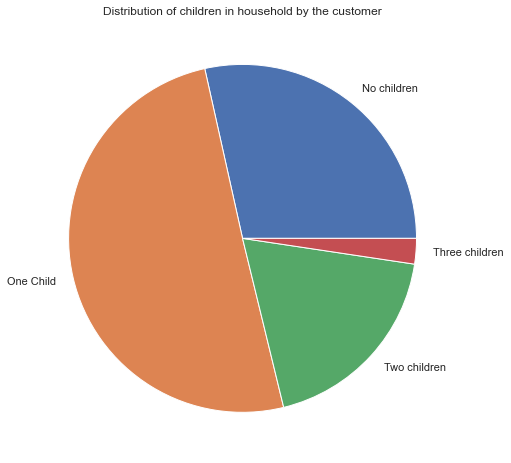

In [242]:
data = df.groupby(['Children']).ID.count()
labels = ['No children', 'One Child', 'Two children', 'Three children']

plt.pie(data, labels = labels)
plt.title('Distribution of children in household by the customer')
plt.show()

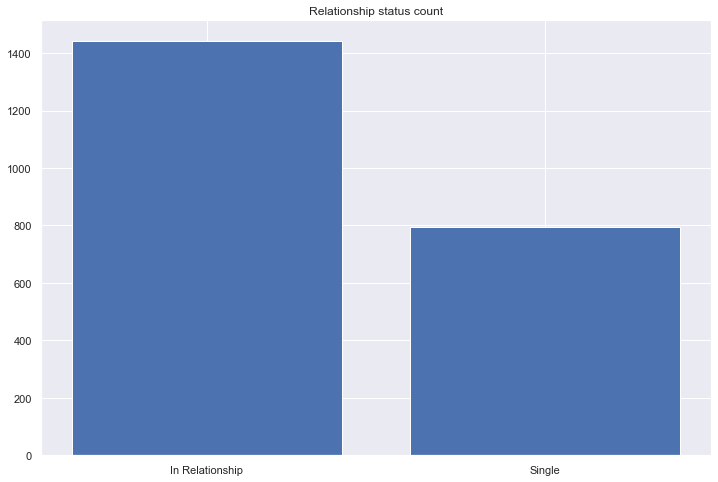

In [243]:
data = df.groupby(['Marital_Status']).ID.count()
labels = ['In Relationship', 'Single']

plt.bar(labels, data)
plt.title('Relationship status count')
plt.show()

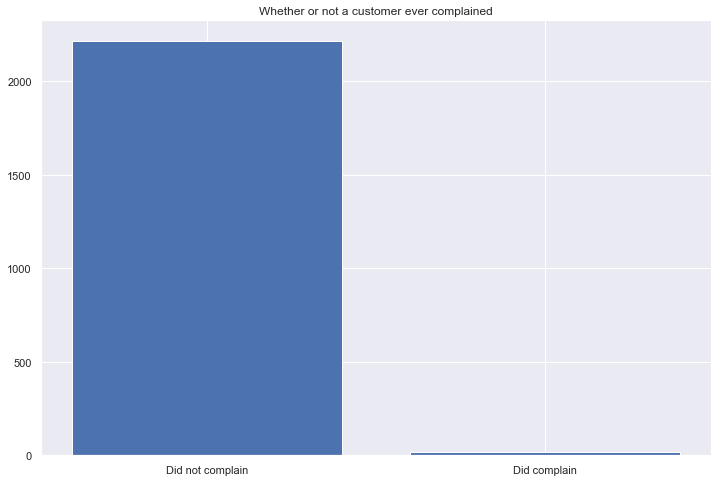

In [244]:
data = df.groupby(['Did_Complain']).ID.count()
labels = ['Did not complain', 'Did complain']

plt.bar(labels, data)
plt.title('Whether or not a customer ever complained')
plt.show()

#### Product Categories

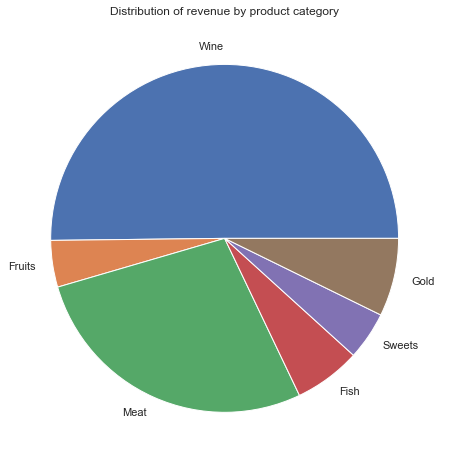

In [245]:
data = [df['Wine_Spent'].sum(),df['Fruits_Spent'].sum(),df['Meat_Spent'].sum(),df['Fish_Spent'].sum(),df['Sweets_Spent'].sum(),df['Gold_Spent'].sum()]
labels = ['Wine','Fruits','Meat','Fish','Sweets','Gold']

plt.pie(data, labels=labels)
plt.title('Distribution of revenue by product category')
plt.show()

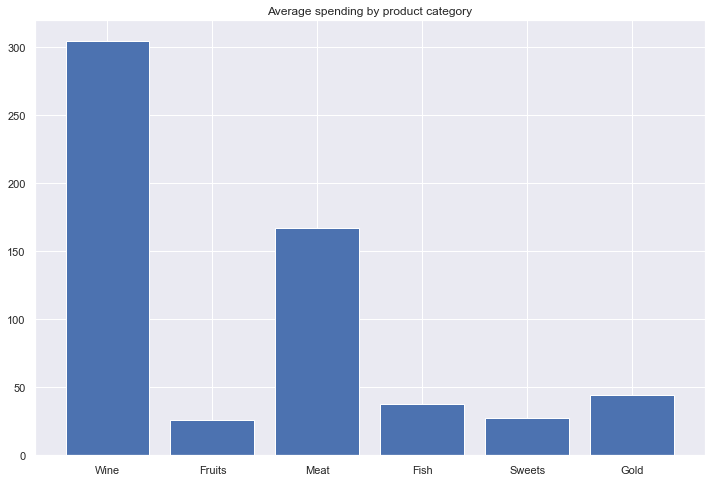

In [246]:
data = [df['Wine_Spent'].mean(), df['Fruits_Spent'].mean(), df['Meat_Spent'].mean(), df['Fish_Spent'].mean(), df['Sweets_Spent'].mean(), df['Gold_Spent'].mean()]

plt.bar(labels, data)
plt.title('Average spending by product category')
plt.show()

#### Purchases

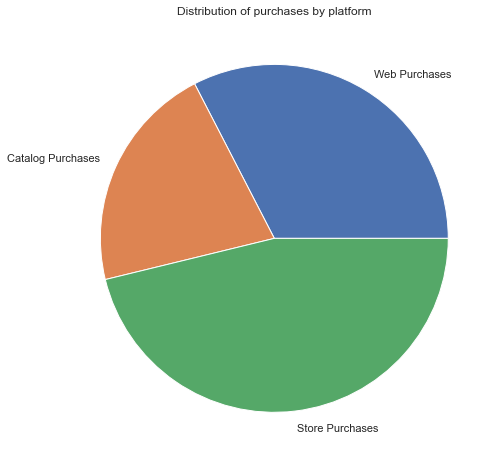

In [247]:
data = [df['Web_Purchases'].sum(), df['Catalog_Purchases'].sum(), df['Store_Purchases'].sum()]
labels = ['Web Purchases', 'Catalog Purchases', 'Store Purchases']

plt.pie(data, labels=labels)
plt.title('Distribution of purchases by platform')
plt.show()

In [248]:
visits_last_month = df['Web_Visits_Month'].sum()

web_purchases_24_months = df['Web_Purchases'].sum()
web_purchases_avg_month = math.floor(web_purchases_24_months / 24)

conversion_rate = round((web_purchases_avg_month / visits_last_month),2) * 100

print(f'Around {conversion_rate}% of web visits result in a purchase (rough approximation).')

Around 3.0% of web visits result in a purchase (rough approximation).


#### Marketing Campaigns

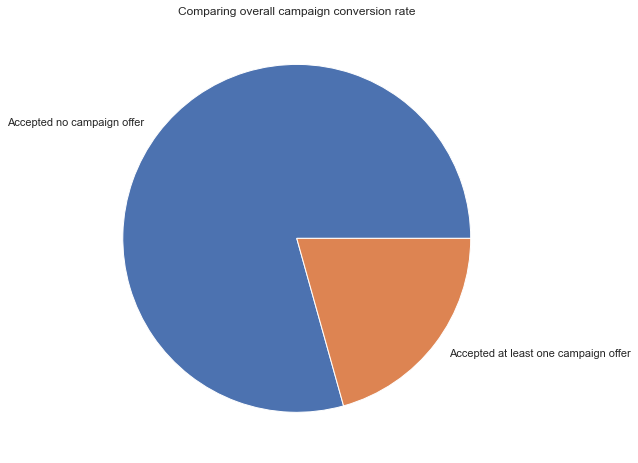

In [249]:
data = df.groupby(['Accepted_Any_Cmp']).ID.count()
labels = ['Accepted no campaign offer', 'Accepted at least one campaign offer']

plt.pie(data, labels=labels)
plt.title('Comparing overall campaign conversion rate')
plt.show()

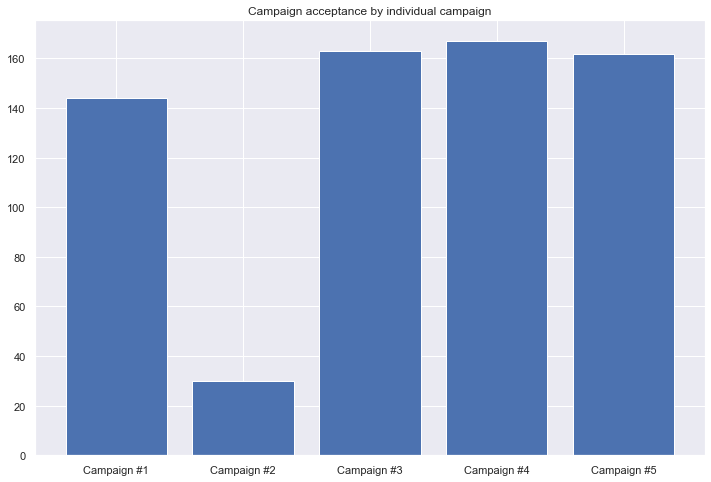

In [250]:
data = [df['Accepted_Cmp_1'].sum(),df['Accepted_Cmp_2'].sum(),df['Accepted_Cmp_3'].sum(),df['Accepted_Cmp_4'].sum(),df['Accepted_Cmp_5'].sum(),]
labels = ['Campaign #1','Campaign #2','Campaign #3','Campaign #4','Campaign #5']

plt.bar(labels, data)
plt.title('Campaign acceptance by individual campaign')
plt.show()

Unfortunately, as we do not know how many active users the store had during each campaign, we cannot tell the percentage of customers who did accept each campaign. However, since it is highly unlikely the customer base dropped significantly only during the second campaign, it is clear that campaign #2 was much less effective than any of the others.

While this would be an interesting situation to dive into further, we are currently missing valuable data for this cause.

#### Education

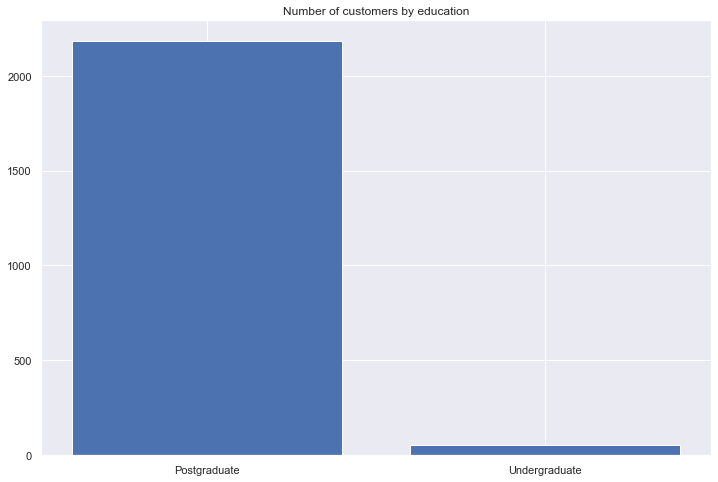

In [251]:
customers_by_education = df.groupby(['Education']).ID.count()
labels = ['Postgraduate', 'Undergraduate']

plt.bar(labels, customers_by_education)
plt.title('Number of customers by education')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

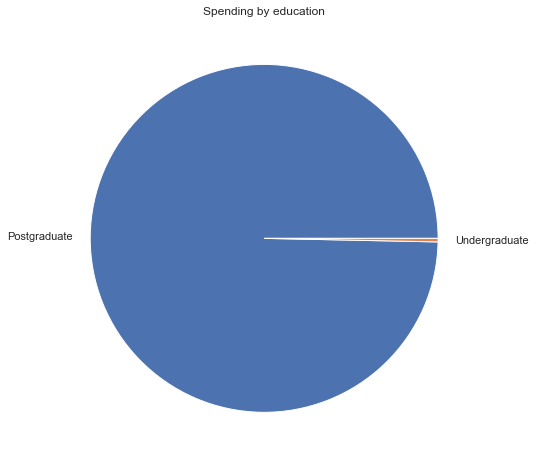

In [252]:
spending_sums = df.groupby(['Education']).Total_Spent.sum()

plt.pie(spending_sums, labels=labels)
plt.title('Spending by education')
plt.show

From this plot it seems that undergraduates spend only a fraction of the money postgraduates do. However, if we recall, there are only a few customers that are undergraduates. So let us take a look at average spending by education.

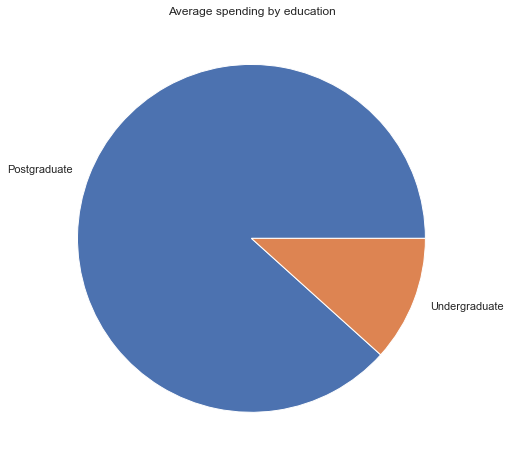

In [253]:
data = df.groupby(['Education']).Total_Spent.mean()

plt.pie(data, labels=labels)
plt.title('Average spending by education')
plt.show()

So from the second of the two plots, we can see that even when averaging spending by education, postgraduates make up more than 3/4's of all revenue by the store.

### Correlations

<AxesSubplot:>

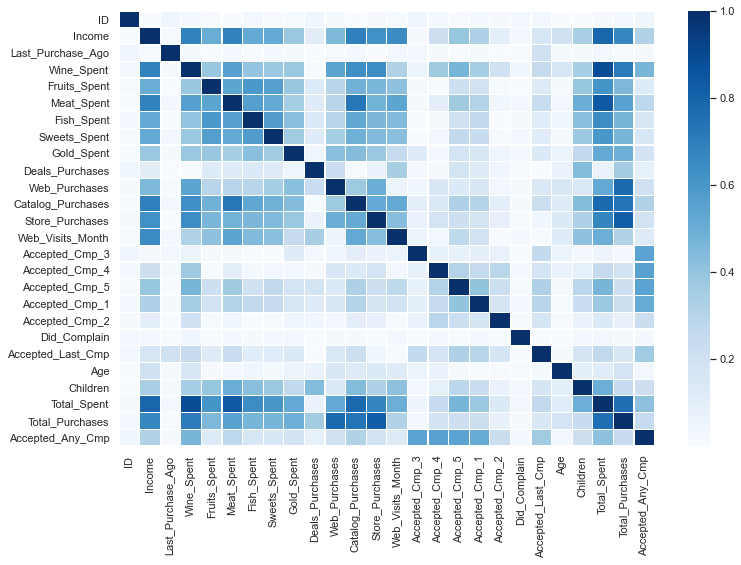

In [254]:
abs_correlations = abs(df.corr())

sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(abs_correlations, annot=False, linewidths=0.2, cmap='Blues')

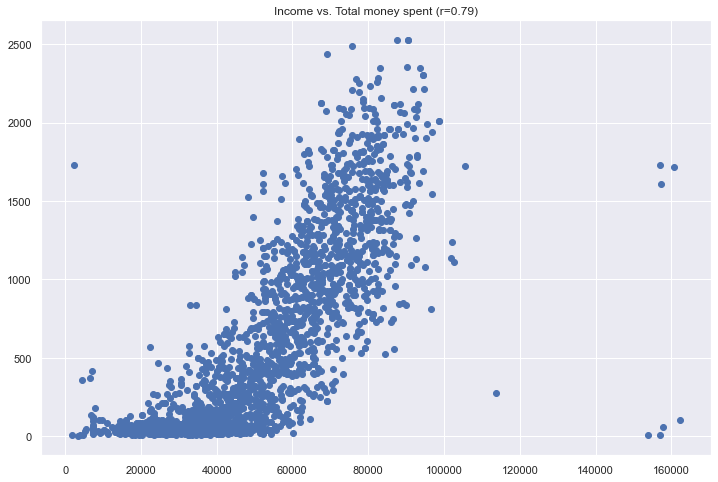

In [255]:
r = round(df['Income'].corr(df['Total_Spent']),2)

plt.scatter(df['Income'], df['Total_Spent'])
plt.title(f'Income vs. Total money spent (r={r})')
plt.show()

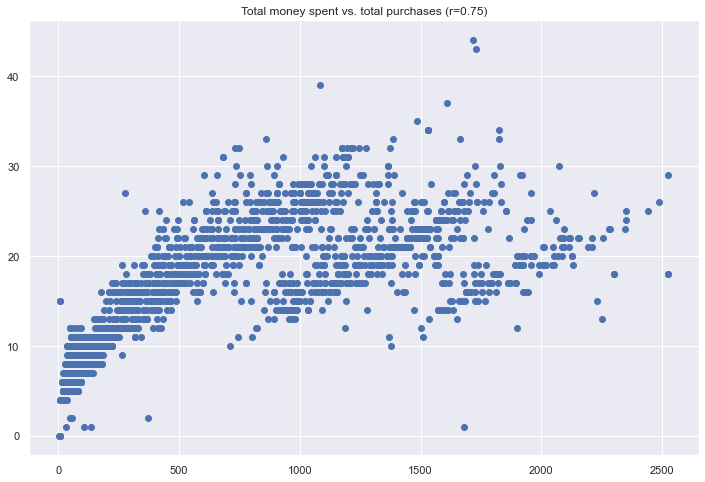

In [256]:
r = round(df['Total_Spent'].corr(df['Total_Purchases']),2)

plt.scatter(df['Total_Spent'], df['Total_Purchases'])
plt.title(f'Total money spent vs. total purchases (r={r})')
plt.show()

## Clustering

### Preparing data

In [257]:
df.dtypes

ID                            int64
Education                    object
Marital_Status               object
Income                      float64
Enrollment_Date      datetime64[ns]
Last_Purchase_Ago             int64
Wine_Spent                    int64
Fruits_Spent                  int64
Meat_Spent                    int64
Fish_Spent                    int64
Sweets_Spent                  int64
Gold_Spent                    int64
Deals_Purchases               int64
Web_Purchases                 int64
Catalog_Purchases             int64
Store_Purchases               int64
Web_Visits_Month              int64
Accepted_Cmp_3                int64
Accepted_Cmp_4                int64
Accepted_Cmp_5                int64
Accepted_Cmp_1                int64
Accepted_Cmp_2                int64
Did_Complain                  int64
Accepted_Last_Cmp             int64
Age                           int64
Children                      int64
Total_Spent                   int64
Total_Purchases             

In [258]:
df.drop(['ID','Last_Purchase_Ago','Deals_Purchases','Web_Purchases','Catalog_Purchases','Store_Purchases',
'Accepted_Cmp_1','Accepted_Cmp_2','Accepted_Cmp_3','Accepted_Cmp_4','Accepted_Cmp_5','Did_Complain','Accepted_Any_Cmp'], 1, inplace=True)

#### Label Encoding non-numerical data

In [259]:
encoder.fit(df['Education'])
df['Education'] = encoder.transform(df['Education'])
df['Education'].head()

0    0
1    0
2    0
3    0
4    0
Name: Education, dtype: int32

In [260]:
encoder.fit(df['Marital_Status'])
df['Marital_Status'] = encoder.transform(df['Marital_Status'])
df['Marital_Status'].head()

0    1
1    1
2    0
3    0
4    0
Name: Marital_Status, dtype: int32

In [261]:
encoder.fit(df['Enrollment_Date'])
df['Enrollment_Date'] = encoder.transform(df['Enrollment_Date'])
df['Enrollment_Date'].head()

0     15
1    635
2    367
3    646
4    504
Name: Enrollment_Date, dtype: int64

#### Scaling the data

In [272]:
df_scaled = df.copy()

scaler.fit(df_scaled)
df_scaled = pd.DataFrame(scaler.transform(df_scaled), columns=df_scaled.columns)
df_scaled

,Education,Marital_Status,Income,Enrollment_Date,Wine_Spent,Fruits_Spent,Meat_Spent,Fish_Spent,Sweets_Spent,Gold_Spent,Web_Visits_Month,Accepted_Last_Cmp,Age,Children,Total_Spent,Total_Purchases
0,-0.157315,1.347635,0.288513,-1.643476,0.983228,1.554170,1.679746,2.461068,1.475396,0.845669,0.692865,2.386338,1.016868,-1.264308,1.680176,1.319340
1,-0.157315,1.347635,-0.262438,1.606506,-0.871064,-0.636431,-0.713455,-0.650414,-0.631638,-0.729742,-0.131421,-0.419052,1.273264,1.395139,-0.962202,-1.155857
2,-0.157315,-0.742041,0.917992,0.201675,0.362159,0.572177,-0.177201,1.344595,-0.147262,-0.038098,-0.543564,-0.419052,0.333146,-1.264308,0.282541,0.798246
3,-0.157315,-0.742041,-1.182621,1.664167,-0.871064,-0.560893,-0.651409,-0.503991,-0.583200,-0.748954,0.280722,-0.419052,-1.290693,0.065416,-0.918994,-0.895310
4,-0.157315,-0.742041,0.295754,0.919816,-0.389661,0.421101,-0.217088,0.154911,-0.001950,-0.556831,-0.131421,-0.419052,-1.034298,0.065416,-0.305762,0.537699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,-0.157315,-0.742041,0.432628,-0.139049,1.203128,0.421101,0.066551,0.081700,2.201960,3.900428,-0.131421,-0.419052,0.162216,0.065416,1.221499,0.407425
2232,-0.157315,-0.742041,0.563008,1.685135,0.302727,-0.661610,-0.607091,-0.687019,-0.655857,-0.691317,0.692865,-0.419052,1.956986,2.724862,-0.269201,0.928519
2233,-0.157315,1.347635,0.234465,0.946026,1.794481,0.546997,0.221666,-0.101329,-0.365231,-0.383920,0.280722,-0.419052,-1.034298,-1.264308,1.055312,0.537699
2234,-0.157315,-0.742041,0.807372,0.940784,0.368102,0.093769,0.208371,0.777208,0.070707,0.326936,-0.955707,-0.419052,1.102333,0.065416,0.393886,1.058793


#### Dimensionality Reduction

In [ ]:
pca = PCA(n_components=3)
pca.fit(df_scaled)

df_pca = pd.DataFrame(pca.transform(df_scaled), columns=(['x','y','z']))
df_pca.describe()

,x,y,z
count,2.236000e+03,2.236000e+03,2.236000e+03
mean,-1.318762e-16,-4.369393e-18,-3.741293e-17
std,2.799434e+00,1.461253e+00,1.161533e+00
min,-4.920470e+00,-3.828703e+00,-3.056503e+00
25%,-2.638539e+00,-1.024643e+00,-7.774071e-01
50%,-6.546050e-01,-2.347214e-01,-9.645801e-02
75%,2.436571e+00,8.722621e-01,6.502297e-01
max,7.583705e+00,6.154995e+00,5.971365e+00


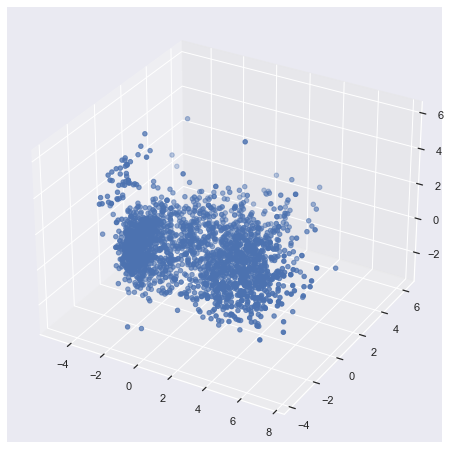

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca['x'],df_pca['y'],df_pca['z'],)
plt.show()

### Elbow Method for optimal n_clusters

In [ ]:
distortions = []

for k in range(1,10):
    km = KMeans(n_clusters=k).fit(df)
    km.fit(df)
    distortions.append(sum(np.min(cdist(df, km.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])

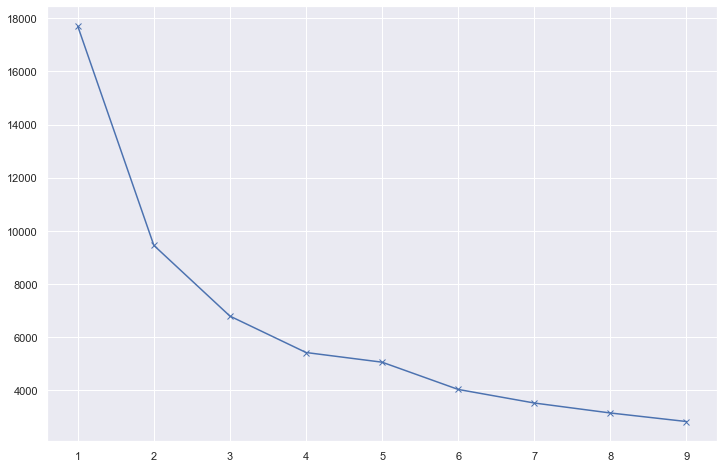

In [ ]:
plt.plot(range(1,10), distortions, 'bx-')
plt.show()

### K-means clustering

In [279]:
km = KMeans(
    n_clusters=4, init='random', n_init=50, random_state=44
)

y_pred = km.fit_predict(df_pca)

y_pred

array([2, 3, 2, ..., 2, 1, 3])

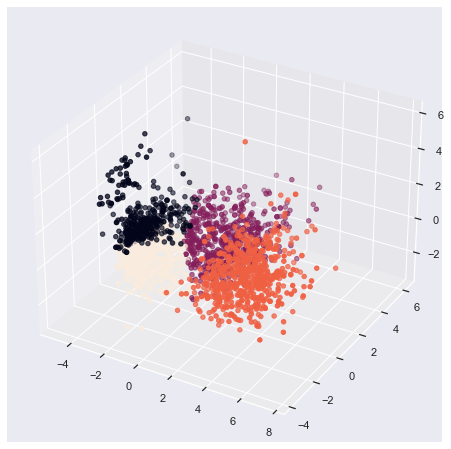

In [280]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca['x'],df_pca['y'],df_pca['z'], c=y_pred)
plt.show()

Trying other models and analyzing results of the K-means model in the future.